Import Libraries and Load Dataset

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load dataset
from google.colab import files
files.upload()
uploaded = files.upload()


Saving ifood_df.csv to ifood_df (1).csv


Saving ifood_df.csv to ifood_df (2).csv


In [9]:
import pandas as pd
import io

# Read the uploaded file into a pandas DataFrame
# Use the correct key found in the uploaded dictionary
df = pd.read_csv(io.BytesIO(uploaded['ifood_df (2).csv']))

In [4]:
import os
import zipfile

# Make a Kaggle directory
os.makedirs("/root/.kaggle", exist_ok=True)

# Move kaggle.json to this directory
!mv kaggle.json /root/.kaggle/

# Set permission
!chmod 600 /root/.kaggle/kaggle.json


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [10]:
# Check for missing values
print(df.isnull().sum())

# Drop nulls or fill them if required
df = df.dropna()

# Basic info
df.info()

# Describe numeric columns
df.describe()


Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [11]:
# Average purchase value
purchase_columns = ['MntWines', 'MntFruits', 'MntMeatProducts',
                    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

df['TotalPurchase'] = df[purchase_columns].sum(axis=1)
df['AveragePurchase'] = df['TotalPurchase'] / len(purchase_columns)

# Frequency of purchases
freq_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df['TotalPurchases'] = df[freq_columns].sum(axis=1)

# Show few rows
df[['TotalPurchase', 'AveragePurchase', 'TotalPurchases']].head()


,TotalPurchase,AveragePurchase,TotalPurchases
0,1617,269.500000,22
1,27,4.500000,4
2,776,129.333333,20
3,53,8.833333,6
4,422,70.333333,14


from matplotlib import pyplot as plt
_df_0['TotalPurchase'].plot(kind='hist', bins=20, title='TotalPurchase')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['AveragePurchase'].plot(kind='hist', bins=20, title='AveragePurchase')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['TotalPurchases'].plot(kind='hist', bins=20, title='TotalPurchases')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='TotalPurchase', y='AveragePurchase', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='AveragePurchase', y='TotalPurchases', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['TotalPurchase'].plot(kind='line', figsize=(8, 4), title='TotalPurchase')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['AveragePurchase'].plot(kind='line', figsize=(8, 4), title='AveragePurchase')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['TotalPurchases'].plot(kind='line', figsize=(8, 4), title='TotalPurchases')
plt.gca().spines[['top', 'right']].set_visible(False)

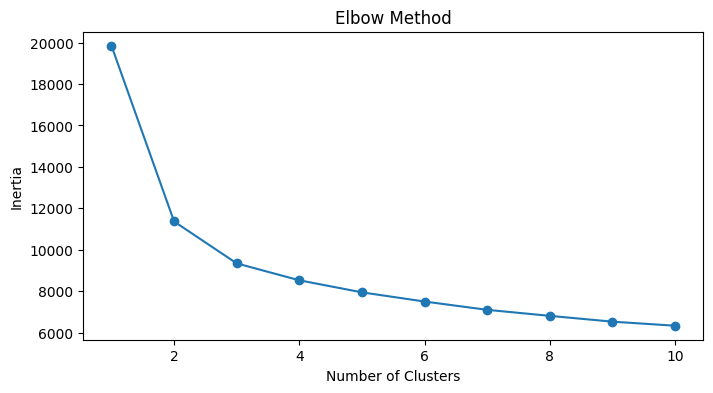

In [12]:
# Features for clustering
features = purchase_columns + freq_columns

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

# Elbow Method to find optimal K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


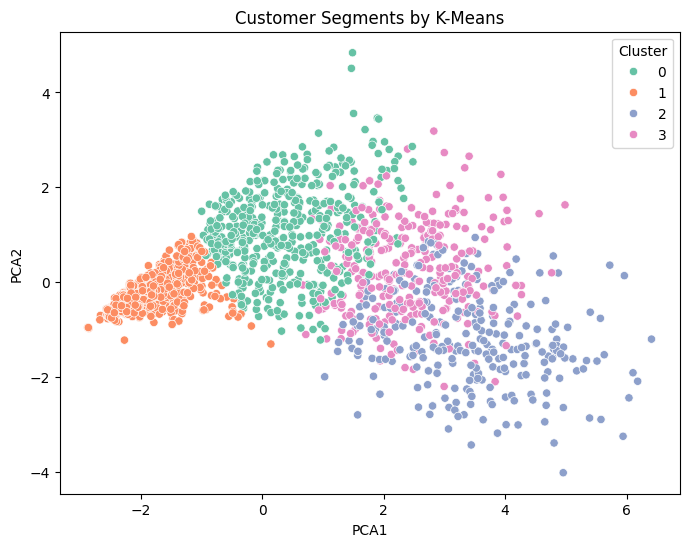

In [13]:
# Apply final KMeans
k = 4  # Use elbow result
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Use PCA for 2D visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set2')
plt.title('Customer Segments by K-Means')
plt.show()


In [14]:
# Average metrics per cluster
cluster_summary = df.groupby('Cluster')[features + ['TotalPurchase', 'TotalPurchases']].mean()
print(cluster_summary)


           MntWines   MntFruits  MntMeatProducts  MntFishProducts  \
Cluster                                                             
0        438.238004   18.262956       123.278311        25.884837   
1         45.046980    4.818792        23.021093         6.849473   
2        504.359060  100.097315       405.117450       125.976510   
3        727.370262   40.376093       453.495627        73.125364   

         MntSweetProducts  MntGoldProds  NumWebPurchases  NumCatalogPurchases  \
Cluster                                                                         
0               18.869482     61.406910         6.428023             2.786948   
1                4.909875     14.567593         2.124640             0.558965   
2              100.352349     95.181208         5.644295             5.291946   
3               43.618076     62.959184         5.233236             6.475219   

         NumStorePurchases  TotalPurchase  TotalPurchases  
Cluster                               